In [7]:
import pandas as pd

In [8]:

df = pd.read_excel("mooc_dataset/online_retail_II.xlsx")
df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [10]:
# Step 1: Data Cleaning
# Drop rows with missing values in 'Description' or 'Customer ID'
cleaned_data = df.dropna(subset=['Description', 'Customer ID'])

# Remove rows with negative or zero quantities
cleaned_data = cleaned_data[cleaned_data['Quantity'] > 0]

# Remove duplicates if any
cleaned_data = cleaned_data.drop_duplicates()

# Display a summary of the cleaned dataset
cleaned_data.info(), cleaned_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400947 non-null  object        
 1   StockCode    400947 non-null  object        
 2   Description  400947 non-null  object        
 3   Quantity     400947 non-null  int64         
 4   InvoiceDate  400947 non-null  datetime64[ns]
 5   Price        400947 non-null  float64       
 6   Customer ID  400947 non-null  float64       
 7   Country      400947 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


(None,
   Invoice StockCode                          Description  Quantity  \
 0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
 1  489434    79323P                   PINK CHERRY LIGHTS        12   
 2  489434    79323W                  WHITE CHERRY LIGHTS        12   
 3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
 4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
 
           InvoiceDate  Price  Customer ID         Country  
 0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
 1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
 3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
 4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  )

In [11]:
transaction_data = (
    cleaned_data.groupby('Invoice')['Description']
    .apply(list)
    .reset_index(name='Items')
)

# Display a sample of the transactional data
transaction_data.head()


,Invoice,Items
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,489435,"[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE..."
2,489436,"[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO..."
3,489437,"[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ..."
4,489438,"[DINOSAURS WRITING SET , SET OF MEADOW FLOWE..."


In [13]:
from mlxtend.preprocessing import TransactionEncoder

# Step 3: Encode transactions for Apriori
te = TransactionEncoder()
te_data = te.fit(transaction_data['Items']).transform(transaction_data['Items'])
encoded_df = pd.DataFrame(te_data, columns=te.columns_)

# Display a preview of the encoded transactional data
encoded_df.head()
encoded_df.to_csv("encoded/shopping_encoded.csv")

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 4: Apply the Apriori algorithm to find frequent itemsets
# Set a minimum support threshold (e.g., 0.01)
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)



TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [17]:
# Step 5: Generate association rules from the frequent itemsets
# Set a minimum confidence threshold (e.g., 0.5)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))

rules.to_csv('mooc_dataset/rules.csv', index=False)

In [84]:
# Display the generated rules
rules = pd.read_csv('mooc_dataset/rules.csv')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({'72 SWEETHEART FAIRY CAKE CASES'}),frozenset({'60 TEATIME FAIRY CAKE CASES'}),0.036118,0.059120,0.018787,0.520173,8.798523,1.0,0.016652,1.960872,0.919557,0.245745,0.490023,0.418977
1,frozenset({'60 TEATIME FAIRY CAKE CASES'}),frozenset({'72 SWEETHEART FAIRY CAKE CASES'}),0.059120,0.036118,0.018787,0.317782,8.798523,1.0,0.016652,1.412865,0.942038,0.245745,0.292218,0.418977
2,frozenset({'PACK OF 60 DINOSAUR CAKE CASES'}),frozenset({'60 TEATIME FAIRY CAKE CASES'}),0.031798,0.059120,0.018579,0.584288,9.883006,1.0,0.016699,2.263297,0.928335,0.256835,0.558167,0.449274
3,frozenset({'60 TEATIME FAIRY CAKE CASES'}),frozenset({'PACK OF 60 DINOSAUR CAKE CASES'}),0.059120,0.031798,0.018579,0.314261,9.883006,1.0,0.016699,1.411909,0.955294,0.256835,0.291739,0.449274
4,frozenset({'60 TEATIME FAIRY CAKE CASES'}),frozenset({'PACK OF 60 MUSHROOM CAKE CASES'}),0.059120,0.023211,0.010617,0.179577,7.736729,1.0,0.009244,1.190593,0.925460,0.148041,0.160082,0.318488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,"frozenset({'WOODEN FRAME ANTIQUE WHITE ', 'WOO...",frozenset({'WOODEN PICTURE FRAME WHITE FINISH'}),0.016341,0.042571,0.011658,0.713376,16.757354,1.0,0.010962,3.340364,0.955946,0.246696,0.700631,0.493607
516,frozenset({'WOOD S/3 CABINET ANT WHITE FINISH'...,frozenset({'WOODEN FRAME ANTIQUE WHITE '}),0.013583,0.052511,0.011658,0.858238,16.343939,1.0,0.010944,6.683638,0.951743,0.214149,0.850381,0.540120
517,frozenset({'WOODEN FRAME ANTIQUE WHITE '}),frozenset({'WOOD S/3 CABINET ANT WHITE FINISH'...,0.052511,0.013583,0.011658,0.222002,16.343939,1.0,0.010944,1.267891,0.990846,0.214149,0.211289,0.540120
518,frozenset({'WOODEN PICTURE FRAME WHITE FINISH'}),"frozenset({'WOODEN FRAME ANTIQUE WHITE ', 'WOO...",0.042571,0.016341,0.011658,0.273839,16.757354,1.0,0.010962,1.354601,0.982135,0.246696,0.261775,0.493607


In [1]:
# Example usage
from recommend import recommend_products 
import pandas as pd
rules = pd.read_csv('rules/shopping_rules.csv')
user_items = ['72 SWEETHEART FAIRY CAKE CASES', '60 TEATIME FAIRY CAKE CASES']
recommended_products = recommend_products(
    user_items,
    rules,
    top_n=5
)
print("Recommended Products:", recommended_products)

Recommended Products: ['PACK OF 72 RETRO SPOT CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'PACK OF 60 DINOSAUR CAKE CASES', 'PACK OF 72 SKULL CAKE CASES', 'WHITE HANGING HEART T-LIGHT HOLDER']


In [ ]:
from sklearn.model_selection import train_test_split

In [19]:
def evaluate_rules(transaction_data, rules, test_size=0.2):
    """
    Evaluate the accuracy of association rules using precision, recall, and F1-score.
    
    Args:
        transaction_data (DataFrame): One-hot encoded transactional data.
        rules (DataFrame): Association rules.
        test_size (float): Proportion of the dataset to include in the test split.
    
    Returns:
        dict: Evaluation metrics (precision, recall, F1-score).
    """
    # Convert the one-hot encoded DataFrame back to a list of transactions
    transactions = transaction_data.drop(columns=['Unnamed: 0']).apply(
        lambda row: set(transaction_data.columns[1:][row.values]), axis=1
    )
    
    # Split transactions into training and test sets
    train, test = train_test_split(transactions, test_size=test_size, random_state=42)
    
    # Prepare a ground truth set from the test transactions
    ground_truth = [frozenset(items) for items in test]
    
    # Initialize counters for evaluation metrics
    correct_predictions = 0
    total_predictions = 0
    possible_recommendations = 0

    # Evaluate each rule
    for rule in rules.itertuples():
        antecedents = eval(rule.antecedents)
        consequents = eval(rule.consequents)
        confidence = rule.confidence

        for transaction in ground_truth:
            # If antecedents are in the transaction, it's a valid recommendation scenario
            if antecedents.issubset(transaction):
                total_predictions += 1
                # Check if the consequents are also in the transaction
                if consequents.issubset(transaction):
                    correct_predictions += 1

        # Count how many transactions could have included the consequents
        possible_recommendations += sum(
            1 for transaction in ground_truth if consequents.issubset(transaction)
        )

    # Calculate precision, recall, and F1-score
    precision = correct_predictions / total_predictions if total_predictions > 0 else 0
    recall = correct_predictions / possible_recommendations if possible_recommendations > 0 else 0
    f1_score = (
        2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    )

    return {
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }
# Example Usage:
metrics = evaluate_rules(transaction_data, rules, test_size=0.3)
print("Evaluation Metrics:", metrics)

Evaluation Metrics: {'Precision': 0.2947979838621184, 'Recall': 0.2947979838621184, 'F1-Score': 0.2947979838621184}


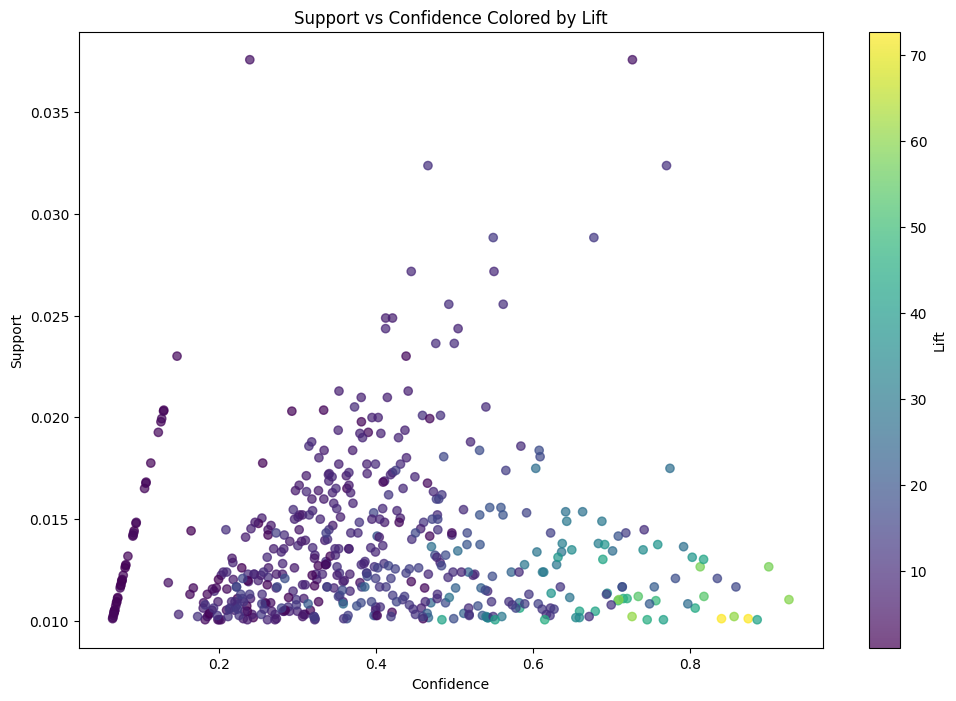

In [2]:
import matplotlib.pyplot as plt

def plot_rules(rules):
    """
    Visualize association rules using support, confidence, and lift.

    Args:
        rules (DataFrame): Association rules.
    """
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        rules['confidence'], rules['support'] , c=rules['lift'], cmap='viridis', alpha=0.7
    )
    plt.colorbar(scatter, label='Lift')
    plt.title('Support vs Confidence Colored by Lift')
    plt.xlabel('Confidence')
    plt.ylabel('Support')
    plt.show()

# Visualize the rules
plot_rules(rules)

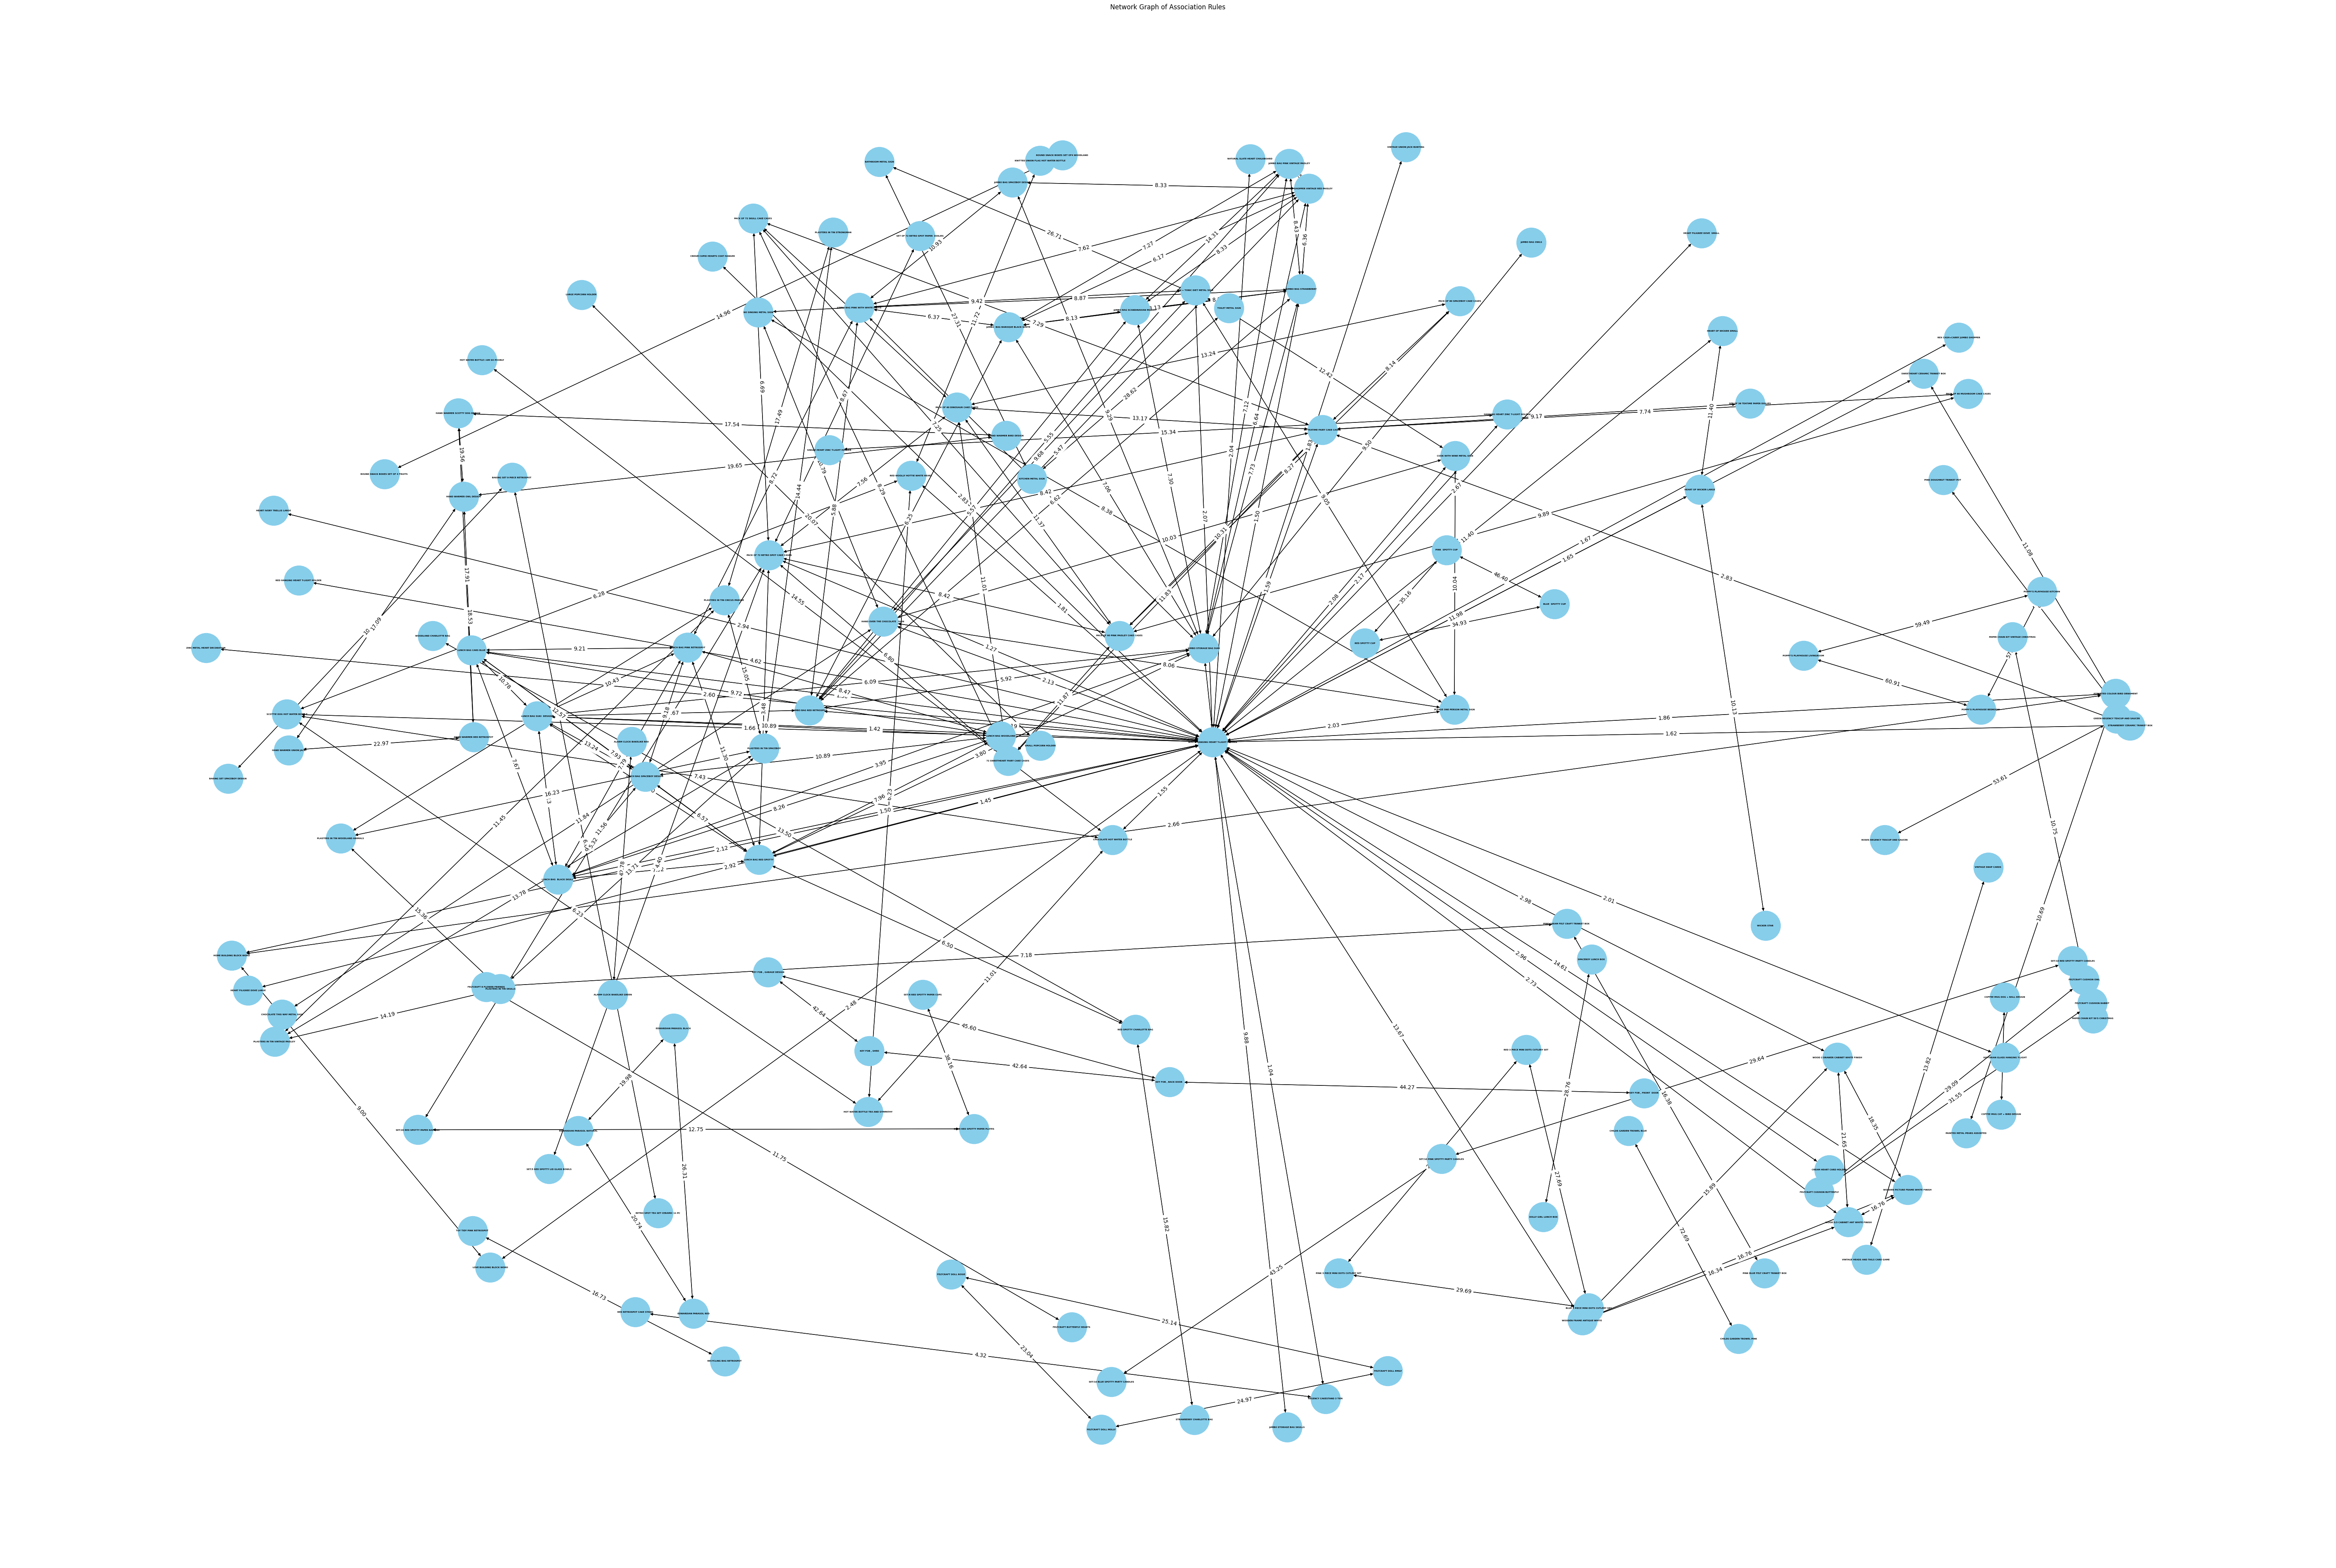

In [27]:
import networkx as nx

def plot_network(rules):
    """
    Visualize association rules as a network graph.

    Args:
        rules (DataFrame): Association rules.
    """
    # Create a directed graph
    graph = nx.DiGraph()

    # Add edges to the graph
    for _, rule in rules.iterrows():
        antecedents = eval(rule['antecedents'])
        consequents = eval(rule['consequents'])
        for ant in antecedents:
            for con in consequents:
                graph.add_edge(ant, con, weight=rule['lift'])

    # Draw the graph
    plt.figure(figsize=(60, 40))
    pos = nx.spring_layout(graph, k=1.5)
    nx.draw(
        graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=4, font_weight="bold"
    )
    nx.draw_networkx_edge_labels(
        graph, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}
    )
    plt.title('Network Graph of Association Rules')
    plt.show()

# Visualize the rules as a network
plot_network(rules)
